In [55]:
# importing all libraries that we need

# numpy for working with array and matrix operations
import numpy as np

# ploting 2D data
from matplotlib import pyplot

# ploting 3D data
from mpl_toolkits.mplot3d import Axes3D

In [56]:
# loading the dataset that we are going to work with
# this data set is just m dimensional data set which contains x and y (we are gonna work with one parameter) which m indicates
# number of training set
data = np.loadtxt('ex1data1.txt', delimiter=',')
x, y = data[:, 0], data[:,1] 

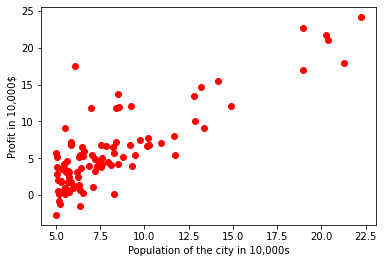

In [57]:
# we are gonna show the data (cause it is only 1 parameter it is easy to visulise it on the graph)
def visualize_data(x, y):
    fig = pyplot.figure()
    pyplot.scatter(x, y, c='red')
    pyplot.ylabel('Profit in 10,000$')
    pyplot.xlabel('Population of the city in 10,000s')
visualize_data(x,y)

<h3>Cost function equation</h3>
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$


In [58]:
# before we start writing cost function we have to insert one column to X matrix, be cause we are gonna use
# vectorized version of computation
#Do not run this column more than ones

m = y.size # we can also write x.size because they are both same at this case
x = np.stack([np.ones(m), x], axis=1)

In [59]:
def compute_costfunction(x,y, theta):
    m = y.size
    h = x @ theta
    difference = (h - y) ** 2
    j = np.sum(difference) / (2 * m)
    return j

In [60]:
# testing to see if out cost function works properly or not
theta = np.array([0.0, 0.0])
j = compute_costfunction(x,y,theta)
print('With theta = [0, 0] \nCost computed = %.2f' % j)
print('Expected cost value (approximately) 32.07\n')


theta = np.array([-1, 2])
j = compute_costfunction(x,y,theta)
print('With theta = [-1, 2]\nCost computed = %.2f' % j)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


<h3>Gradient decent</h3>

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


In [66]:
def gradient_decent(x,y,theta,alpha,num_iters):
    m = y.shape[0]
    tetha = theta.copy()
    j_history = []
    
    for i in range(num_iters):
        h = x @ theta
        difference = (h - y)
        theta = theta - (alpha / m) * (x.T @ difference)
        
        #then we compute cost function for each itteration to see the changes
        j_history.append(compute_costfunction(x,y, theta))
    
    return theta, j_history
    

In [68]:
# testing our gradoent decent function
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradient_decent(x ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


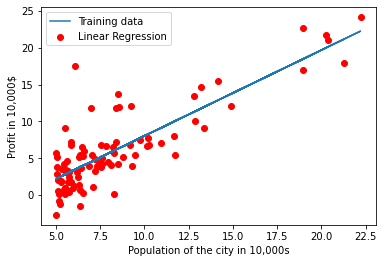

In [71]:
visualize_data(x[:,1], y)
pyplot.plot(x[:, 1], np.dot(x, theta), '-')
pyplot.legend(['Training data', 'Linear Regression'])

In [72]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45

